In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.linear_model import LogisticRegression as LR

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X = pd.read_csv('CATSnDOGS.csv')
y = pd.read_csv('Labels.csv')
X_array = np.array(X)
y_array = np.reshape(np.array(y),-1)


In [ ]:
def get_X_noise(X_array,y,noise_lvl):
    X_noise = np.copy(X_array)
    n_pixels = int(noise_lvl*int(X.shape[1]))
    pixels = random.sample(range(0,X.shape[1]),n_pixels)
    rand = np.linspace(0,256,257)*1
    for i in range(len(pixels)):
        randomlist = []
        for j in range(len(y)):
            n = random.randint(0,256)
            randomlist.append(n)
        X_noise[:,pixels[i]] = randomlist

    return X_noise, pixels
    
def split_data(X,y,trainsize = 0.75):
    
    M = np.c_[np.linspace(0, y.shape[0]-1, num=y.shape[0]),y,X]
    np.random.shuffle(M)
    index = M[:,0]
    y = M[:,1]
    X = M[:,2:]

    X_train = X[:int(len(X_array)*trainsize),:]
    X_test = X[int(len(X_array)*trainsize):,:]
    y_train = y[:int(len(X_array)*trainsize)]
    y_test = y[int(len(X_array)*trainsize):]
    index_train = index[:int(len(X_array)*trainsize)]
    index_test = index[int(len(X_array)*trainsize):]

    return X_train,X_test,y_train,y_test,index_train,index_test

def classify(X_,y_,times = 50):
    acc = []
    f1 = []
    test_score = []
    mislabeled = np.zeros(y.shape[0])
    coefs = []
    for i in range(times):
        X_train,X_test,y_train,y_test,index_train,index_test = split_data(X_,y_)
        
        lr = LR(max_iter=100) # Change to GNB or LR
        lr.fit(X_train,y_train) 
        coefs.append(lr.coef_)
        pred = lr.predict(X_test)
        test_score.append(lr.score(X_train,y_train))
        acc.append(accuracy_score(pred,y_test))
        f1.append(f1_score(pred,y_test))
        for i in range(len(pred)):
            if y_test[i] != pred[i]:
                mislabeled[int(index_test[i])] += 1
    mean_coefs = np.mean(coefs,axis=0)
    mean_acc = np.mean(acc)
    mean_f1 = np.mean(f1)
    mean_test_score = np.mean(test_score)
    return mean_acc,mean_f1,mislabeled, mean_coefs

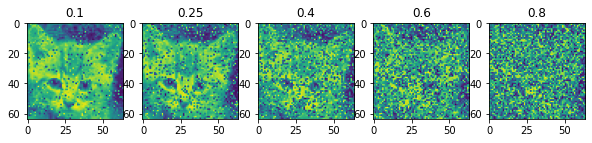

In [ ]:
noise_lvl = [0.1,0.25,0.4,0.6,0.75,]

X_noise,pixels = get_X_noise(X_array,y,noise_lvl[0])

pic = X_noise[0,:]
X_noise,pixels = get_X_noise(X_array,y,noise_lvl[1])
pic2 = X_noise[0,:]
X_noise,pixels = get_X_noise(X_array,y,noise_lvl[2])
pic3 = X_noise[0,:]
X_noise,pixels = get_X_noise(X_array,y,noise_lvl[3])
pic4 = X_noise[0,:]
X_noise,pixels = get_X_noise(X_array,y,noise_lvl[4])
pic5 = X_noise[0,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)
pic3 = np.rot90(np.reshape(pic3,[64,64]), k=-1)
pic4 = np.rot90(np.reshape(pic4,[64,64]), k=-1)
pic5 = np.rot90(np.reshape(pic5,[64,64]), k=-1)
plt.figure(figsize=(10,6))
plt.subplot(151)
plt.title('0.1')
plt.imshow(pic)
plt.subplot(152)
plt.title('0.25')
plt.imshow(pic2)
plt.subplot(153)
plt.title('0.4')
plt.imshow(pic3)
plt.subplot(154)
plt.title('0.6')
plt.imshow(pic4)
plt.subplot(155)
plt.title('0.8')
plt.imshow(pic5)

In [ ]:
noise_lvl = [0.1,0.25,0.4,0.6,0.8]
mean_acc_tot = []
mean_f1_tot = []
coefs_tot = []
for i in range(len(noise_lvl)+1): 

    if i == 5:
        mean_acc,mean_f1,mislabeled, mean_coefs = classify(X_array,y)
    else:    
        X_noise,pixels = get_X_noise(X_array,y,noise_lvl[i])
        mean_acc,mean_f1,mislabeled, mean_coefs = classify(X_noise,y)
    
        mean_acc_tot.append(mean_acc)
        mean_f1_tot.append(mean_f1)
        coefs_tot.append(mean_coefs)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/line

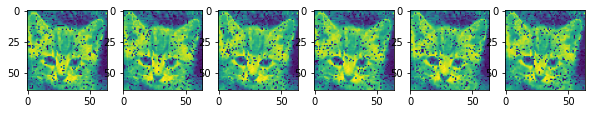

In [ ]:
important_all = []
plt.figure(figsize=(10,10))
for i in range(len(noise_lvl)+1):
    if i == 5: 
        feature_importance = abs(mean_coefs)
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_ind = np.argsort(feature_importance)
        most_important = sorted_ind[0,0:300]
        important_all.append(most_important)
        pic = np.copy(X_array[0,:])
        pic[most_important] = 0
        pic = np.rot90(np.reshape(pic,[64,64]), k=-1)
        plt.subplot(1,6,i+1)
        plt.imshow(pic)
    else: 
        feature_importance = abs(coefs_tot[i])
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_ind = np.argsort(feature_importance)
        most_important = sorted_ind[0,0:300]
        important_all.append(most_important)
        pic = np.copy(X_array[0,:])
        pic[most_important] = 0
        pic = np.rot90(np.reshape(pic,[64,64]), k=-1)
        plt.subplot(1,6,i+1)
        plt.imshow(pic)

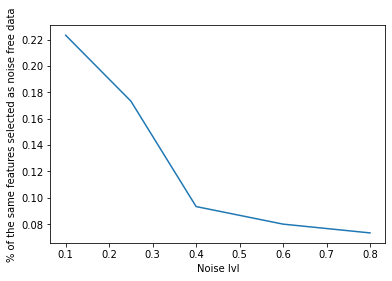

In [ ]:
important_all[0]
same = []
A = np.isin(important_all[5], important_all[0])
same.append(len(important_all[0][A])/300)
A = np.isin(important_all[5], important_all[1])
same.append(len(important_all[0][A])/300)
A = np.isin(important_all[5], important_all[2])
same.append(len(important_all[0][A])/300)
A = np.isin(important_all[5], important_all[3])
same.append(len(important_all[0][A])/300)
A = np.isin(important_all[5], important_all[4])
same.append(len(important_all[0][A])/300)

plt.figure(figsize=(6,4))
plt.xlabel("Noise lvl")
plt.ylabel("% of the same features selected as noise free data")
plt.plot(noise_lvl,same)


[0.7346574692265573, 0.7648551198906753, 0.761162749457656, 0.7534631808475798, 0.7113485064596361]
0.7489792735018438


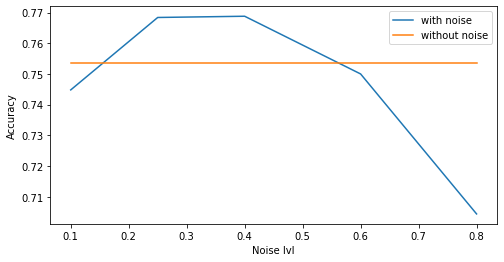

In [ ]:
plt.figure(figsize=(8,4))
plt.xlabel("Noise lvl")
plt.ylabel("Accuracy")
plt.plot(noise_lvl,mean_acc_tot,label='with noise')
plt.plot(noise_lvl,np.linspace(mean_acc,mean_acc,5),label='without noise')
plt.legend(loc='best')
print(mean_f1_tot)
print(mean_f1)

In [ ]:
X_noise,pixels = get_X_noise(X_array,y,noise_lvl[4])
X_train,X_test,y_train,y_test,index_train,index_test = split_data(X_noise,y)
lr = LR(max_iter= 100) # Change to GNB or LR
lr.fit(X_train,y_train) 
coefs.append(lr.coef_)
pred = lr.predict(X_test)
acc = accuracy_score(pred,y_test)
print(acc)

0.725


In [ ]:
np.linspace(mean_acc,mean_acc,5)

array([0.74, 0.74, 0.74, 0.74, 0.74])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=98914b02-c3e6-4d22-a781-75e1a0c3af40' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>